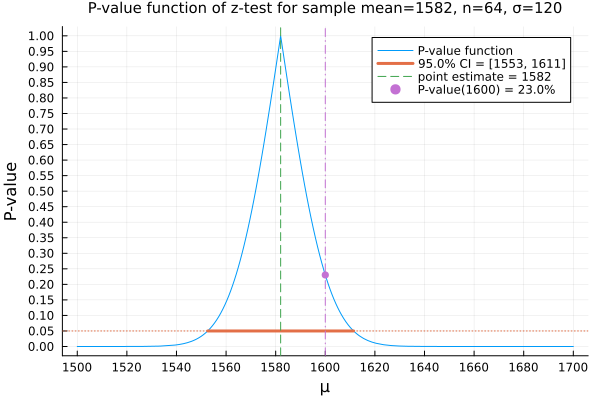

In [1]:
using Distributions
using Printf
using StatsPlots
default(fmt=:png, titlefontsize=10)

function pvalue_ztest(X̄, n; μ, σ)
    z = √n * (X̄ - μ) / σ
    2ccdf(Normal(), abs(z))
end

function confint_ztest(X̄, n; σ, α=0.05)
    c = cquantile(Normal(), α/2)
    [X̄ - c*σ/√n, X̄ + c*σ/√n]
end

μ = 1600
σ = 120
n = 64
X̄ = 1582
α = 0.05

pval = pvalue_ztest(X̄, n; μ, σ)
ci = confint_ztest(X̄, n; σ, α)

plot(μ -> pvalue_ztest(X̄, n; μ, σ), 1500, 1700; label="P-value function", c=1)
hline!([α]; label="", c=2, ls=:dot)
plot!(ci, fill(α, 2); label="$(100(1-α))% CI = $(round.(Int, ci))", lw=3, c=2)
vline!([X̄]; label="point estimate = $X̄", c=3, ls=:dash)
vline!([μ]; label="", c=4, ls=:dashdot)
scatter!([μ], [pval]; label="P-value($μ) = $(round(100pval; sigdigits=3))%", msc=:auto, c=4)
plot!(ytick=:0:0.05:1, xtick=1000:20:2000)
plot!(xguide="μ", yguide="P-value")
title!("P-value function of z-test for sample mean=$(X̄), n=$n, σ=$σ")

[ Info: Saved animation to D:\OneDrive\public\0046\tmp.gif


Plots.AnimatedGif("D:\\OneDrive\\public\\0046\\tmp.gif")
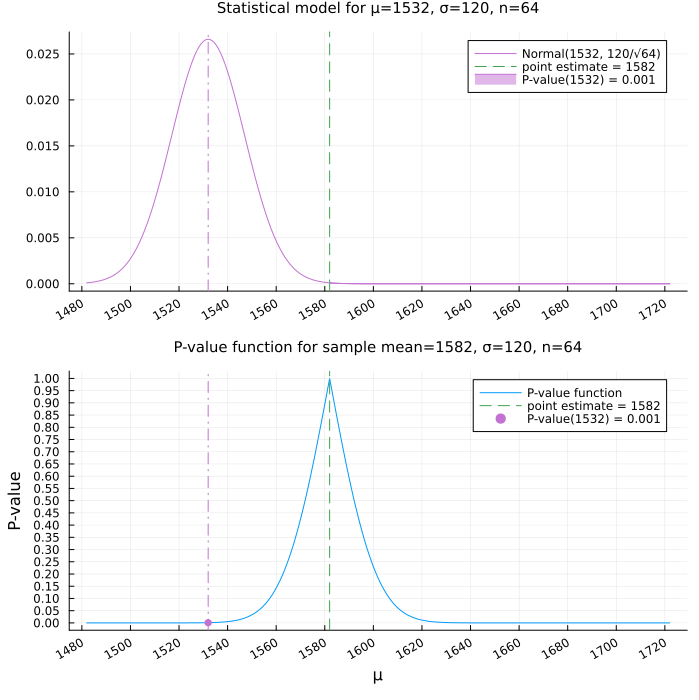

In [2]:
σ = 120
n = 64
X̄ = 1582
α = 0.05
a, b = 1482, 1682+40

μs = (1582-50):(1582+50)
μs = [μs; reverse(μs)]

@gif for μ in μs
    pval = pvalue_ztest(X̄, n; μ, σ)
    ci = confint_ztest(X̄, n; σ, α)
    c, d = minmax(X̄, 2μ-X̄)
    pvalstr = @sprintf "%5.3f" pval

    P = plot()
    plot!(Normal(μ, σ/√n), a, b; label="Normal($μ, $σ/√$n)", c=4)
    vline!([X̄]; label="point estimate = $X̄", c=3, ls=:dash)
    vline!([μ]; label="", c=4, ls=:dashdot)
    plot!(Normal(μ, σ/√n), a, c; fillrange=0, fa=0.5, label="P-value($μ) = $(pvalstr)", c=4)
    plot!(Normal(μ, σ/√n), d, b; fillrange=0, fa=0.5, label="", c=4)
    plot!(xtick=1000:20:2000, xrotation=30)
    title!("Statistical model for μ=$μ, σ=$σ, n=$n")

    Q = plot(μ -> pvalue_ztest(X̄, n; μ, σ), a, b; label="P-value function", c=1)
    #hline!([α]; label="", c=2, ls=:dot)
    #plot!(ci, fill(α, 2); label="$(100(1-α))% CI = $(round.(Int, ci))", lw=3, c=2)
    vline!([X̄]; label="point estimate = $X̄", c=3, ls=:dash)
    vline!([μ]; label="", c=4, ls=:dashdot)
    scatter!([μ], [pval]; label="P-value($μ) = $(pvalstr)", msc=:auto, c=4)
    plot!(ytick=:0:0.05:1, xtick=1000:20:2000, xrotation=30)
    plot!(xguide="μ", yguide="P-value", ylim=(-0.03, 1.03))
    title!("P-value function for sample mean=$(X̄), σ=$σ, n=$n")

    plot(P, Q; size=(700, 700), layout=(2, 1))#, legend=:outertopright)
end